# INSY 695 Final Project
##### Group Members: Alice Liu, Corrine Jiang, Yi Kuang, Yichen Wang, Yulin Hong, Jingyu Chen, Kexin Wang, Xintong Li 

## 1. Environment Setup

### 1.1 Load Packages

In [ ]:
import pandas as pd
import numpy as np

### 1.2 Load Spotify Dataset

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv')

In [ ]:
data1

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


## 2. Data Pre-processing

###2.1 Drop unnecessary columns

Column 'id' contains all unique values, which is not useful for machine larning. <br>
Column 'release_date' contains information which is repeated in column 'year'.

In [ ]:
data2 = data1.drop(columns=['id','release_date'])

In [ ]:
data2

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,How Would I Know,"['Kygo', 'Oh Wonder']",180700,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


###2.2 Data Structure and Value Exploration

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169909 non-null  object 
 1   artists           169909 non-null  object 
 2   duration_ms       169909 non-null  int64  
 3   year              169909 non-null  int64  
 4   acousticness      169909 non-null  float64
 5   danceability      169909 non-null  float64
 6   energy            169909 non-null  float64
 7   instrumentalness  169909 non-null  float64
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  speechiness       169909 non-null  float64
 11  tempo             169909 non-null  float64
 12  valence           169909 non-null  float64
 13  mode              169909 non-null  int64  
 14  key               169909 non-null  int64  
 15  popularity        169909 non-null  int64  
 16  explicit          16

In [ ]:
data2.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,2.314062e+05,1977.223231,0.493214,0.538150,0.488593,0.161937,0.206690,-11.370289,0.094058,116.948017,0.532095,0.708556,5.200519,31.556610,0.084863
std,1.213219e+05,25.593168,0.376627,0.175346,0.267390,0.309329,0.176796,5.666765,0.149937,30.726937,0.262408,0.454429,3.515257,21.582614,0.278679
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.778000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,2.629600e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000


We see that this is a fairly clean dataset mainly consisted of numeric values, which is ideal for data learning (regression, clustering, etc.).

###2.3 Create New Columns

We want to create a column that contains data on number of artists.

In [ ]:
data2['NumArtists'] = pd.Series(dtype='int')
for i in range(data2.shape[0]):
  string = data2['artists'][i]
  string = string[1:len(string)-1]
  string = string.split(',')
  data2['NumArtists'][i] = int(len(string))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data2

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1.0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2.0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1.0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1.0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1,2.0
169905,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0,2.0
169906,How Would I Know,"['Kygo', 'Oh Wonder']",180700,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0,2.0
169907,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0,2.0


We also want to create a column about the name length of a song.

In [ ]:
data2['NameLength'] = pd.Series(dtype='int')
for i in range(data2.shape[0]):
  n = len(data2['name'][i].split())
  data2['NameLength'][i] = int(n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data2

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,NameLength
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1.0,4.0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2.0,6.0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1.0,5.0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1.0,5.0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1,2.0,5.0
169905,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0,2.0,4.0
169906,How Would I Know,"['Kygo', 'Oh Wonder']",180700,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0,2.0,4.0
169907,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0,2.0,3.0


We then discard column 'name' and 'artists', as they are no longer useful.

In [ ]:
data = data2.drop(columns = ['name','artists'])

In [ ]:
data

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,NameLength
0,158648,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1.0,4.0
1,282133,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2.0,6.0
2,104300,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1.0,5.0
3,180760,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1.0,5.0
4,687733,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,163800,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1,2.0,5.0
169905,167468,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0,2.0,4.0
169906,180700,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0,2.0,4.0
169907,167308,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0,2.0,3.0


 let's check to see if there are any duplicate rows that might skew our data a certain way:

In [ ]:
data[data.duplicated()]

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,NameLength
609,61467,1945,0.98300,0.635,0.0123,0.955000,0.1070,-27.297,0.0521,83.046,0.610,1,0,0,0,3.0,14.0
652,1325093,1945,0.91300,0.704,0.2230,0.000000,0.3260,-24.480,0.9350,112.485,0.403,0,2,0,0,1.0,4.0
3344,260333,1972,0.12800,0.591,0.6370,0.019500,0.0989,-9.102,0.0887,172.452,0.962,0,5,26,0,1.0,6.0
8094,230040,2020,0.46000,0.591,0.6590,0.000000,0.3240,-5.464,0.0332,145.997,0.622,1,11,2,0,1.0,4.0
8169,491333,1928,0.99300,0.303,0.2260,0.826000,0.1190,-21.483,0.0444,67.013,0.146,1,3,0,0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164200,164467,1963,0.83800,0.493,0.2170,0.004630,0.0867,-11.501,0.0271,105.003,0.182,1,9,20,0,1.0,2.0
166015,262147,1982,0.21300,0.291,0.9750,0.908000,0.3320,-10.754,0.0557,180.289,0.127,0,6,33,0,1.0,5.0
168041,179773,2002,0.04210,0.625,0.9250,0.000000,0.8650,-4.435,0.3420,172.017,0.515,1,0,47,0,1.0,1.0
169035,281947,2012,0.80600,0.390,0.2550,0.000001,0.0887,-9.676,0.0299,122.056,0.179,0,6,50,0,1.0,4.0


Hence drop the duplicated rows

In [ ]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,NameLength


Hence, we've finished the data preprosessing.

#**data exploration**

Correlations (Check top 10 positive and negative correlations)

In [ ]:
corr = data.corr()['popularity'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
valence         0.005033
key             0.011052
duration_ms     0.063238
tempo           0.133543
explicit        0.213450
danceability    0.217697
loudness        0.463656
energy          0.495026
year            0.880401
popularity      1.000000
Name: popularity, dtype: float64

Top 10 - Negative Correlations:
------------------------------
acousticness       -0.591012
instrumentalness   -0.295625
NameLength         -0.273048
NumArtists         -0.159573
speechiness        -0.137648
liveness           -0.075998
mode               -0.033346
valence             0.005033
key                 0.011052
duration_ms         0.063238
Name: popularity, dtype: float64


Correlation matrix

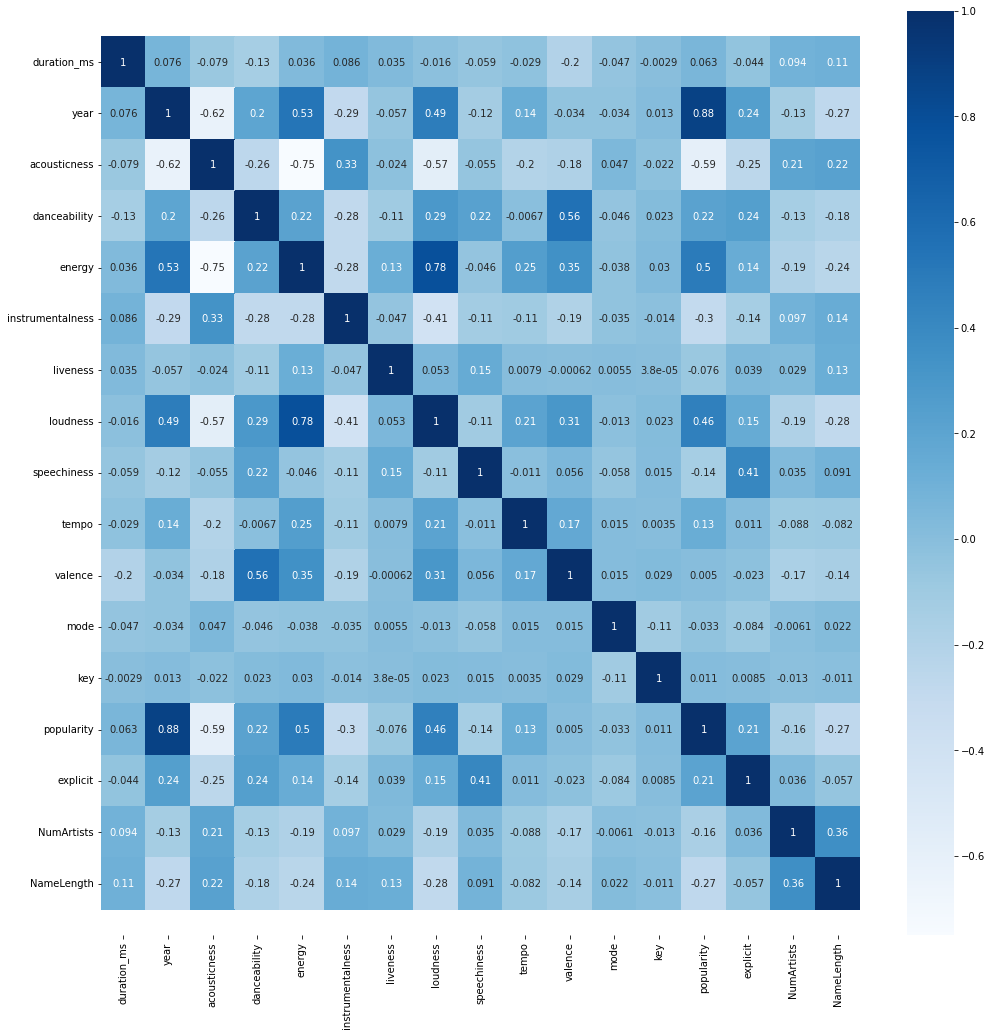

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,17))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

Distribution of discrete features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

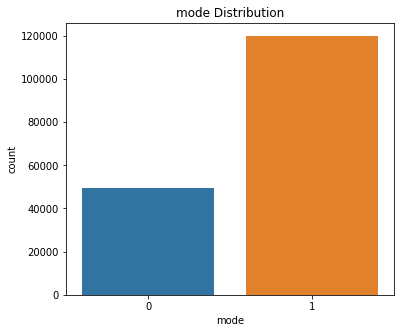

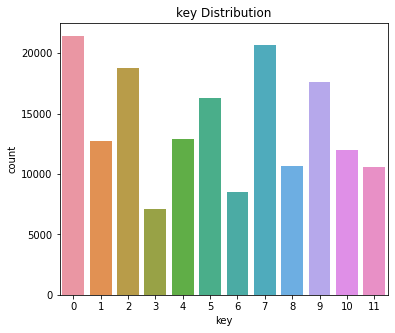

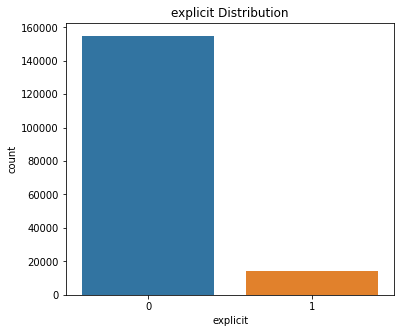

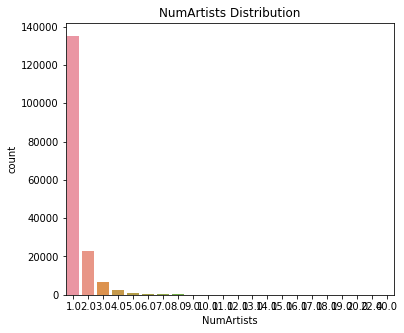

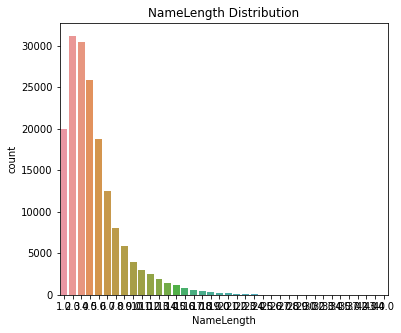

In [ ]:
discrete_cols = data[['mode','key', 'explicit', 'NumArtists', 'NameLength']]
for i in discrete_cols:
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.countplot(data[i])
    plt.title(i+' Distribution')


Distribution of continuous features

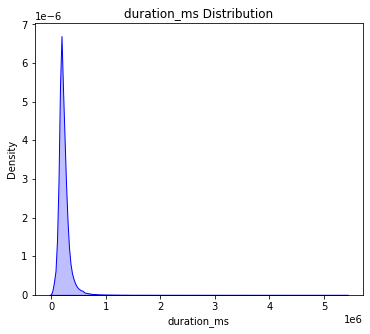

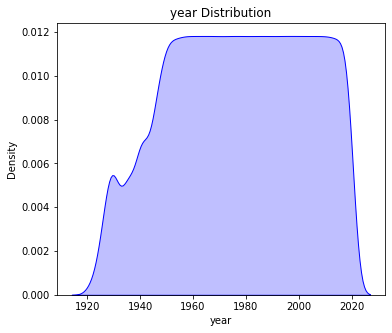

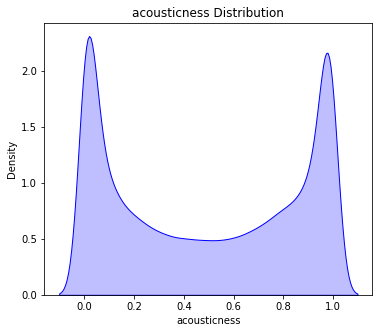

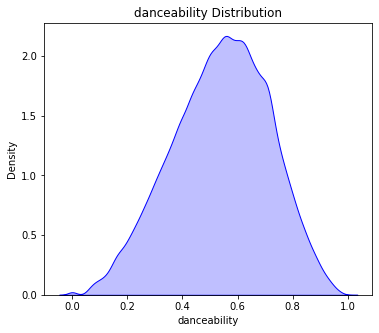

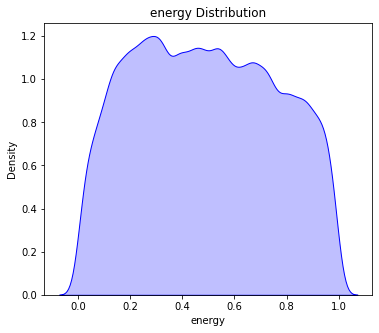

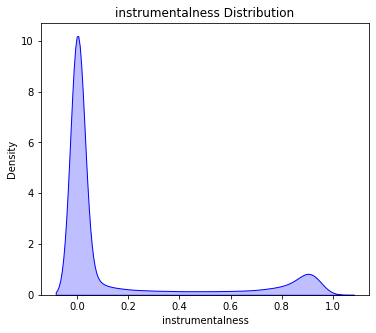

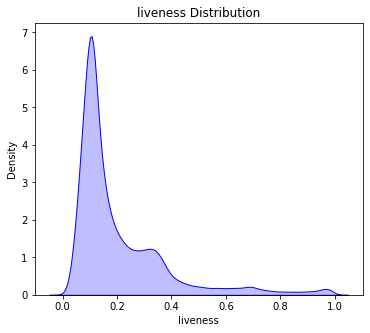

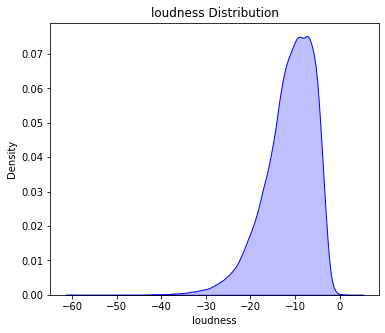

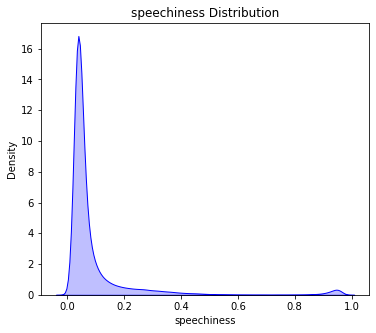

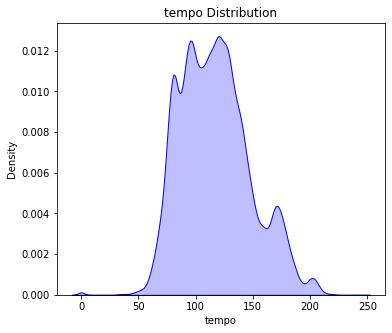

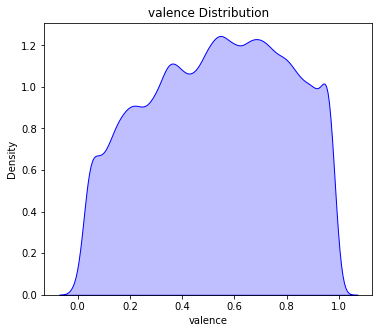

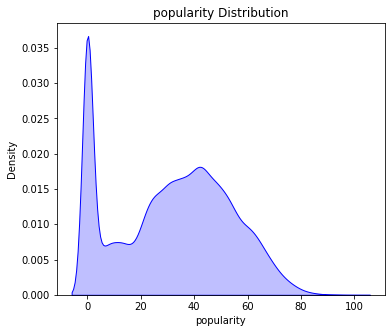

In [ ]:
continuous_cols = data.drop(columns = ['mode','key', 'explicit', 'NumArtists', 'NameLength'])
for i in continuous_cols:
    plt.figure(figsize=(20,5))
    
    plt.subplot(131)
    sns.kdeplot(data[i],color='b',shade=True)
    plt.title(i+' Distribution')

Before starting to construct the models, we need to detect if there exists the heteroskedasticity problem. Otherwise the inconsistency of a variance can cause the linear regression model to have high bias.

In [ ]:
data.head(5)

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,NameLength
0,158648,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1.0,4.0
1,282133,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2.0,6.0
2,104300,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1.0,5.0
3,180760,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1.0,5.0
4,687733,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2.0,6.0


In [ ]:
x = data.drop(columns = ['popularity'])
y = data['popularity']

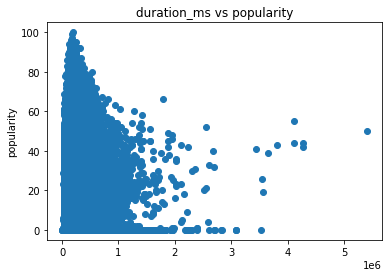

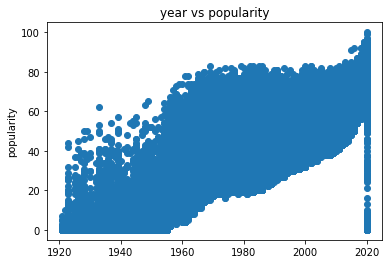

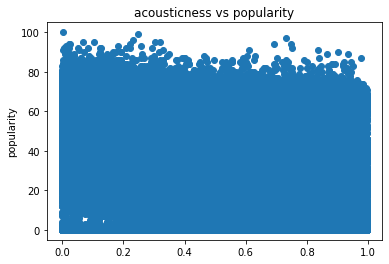

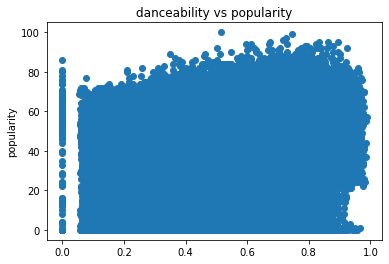

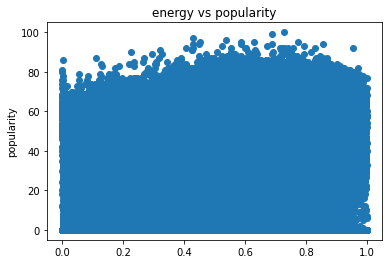

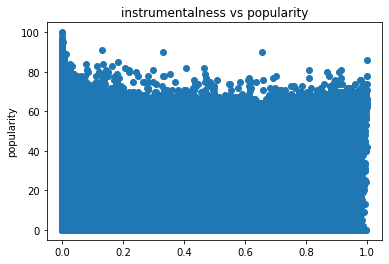

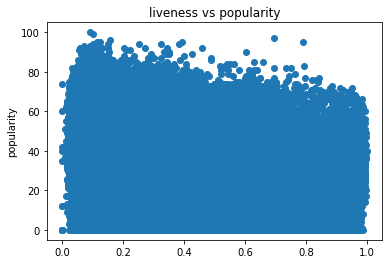

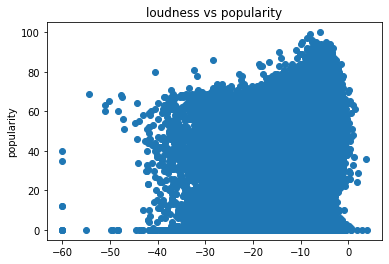

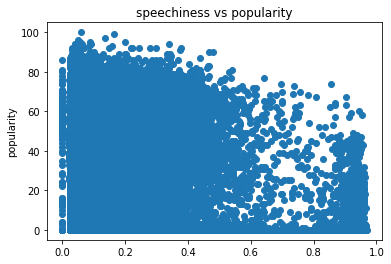

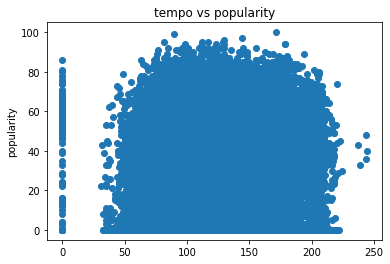

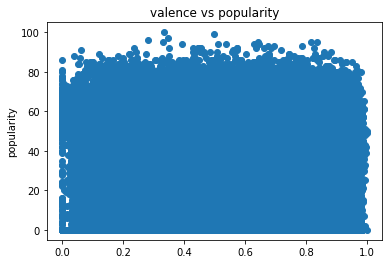

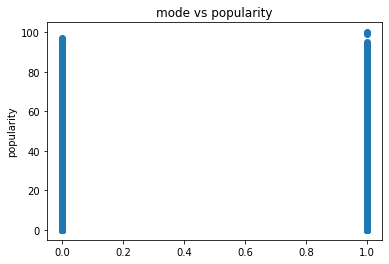

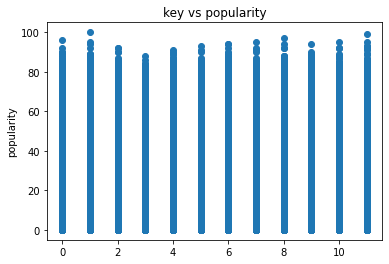

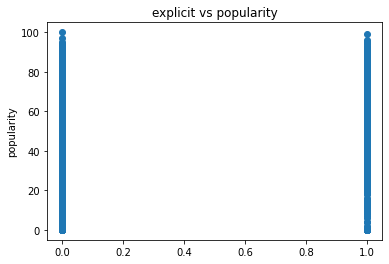

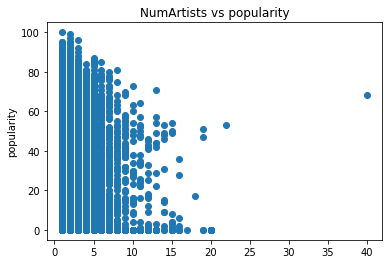

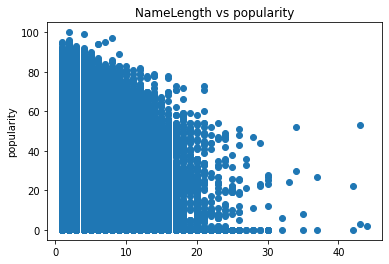

In [ ]:
for i in x:
  plt.figure()
  plt.title(i + ' vs popularity')
  plt.scatter(data[i], y)
  plt.ylabel('popularity')

According to the graphs above, there is no obvious horn shape figures existing. Thus we conclude that the heteroscedasticity does not exist in our dataset.

**Check how the trend of music evolves throughout the years**



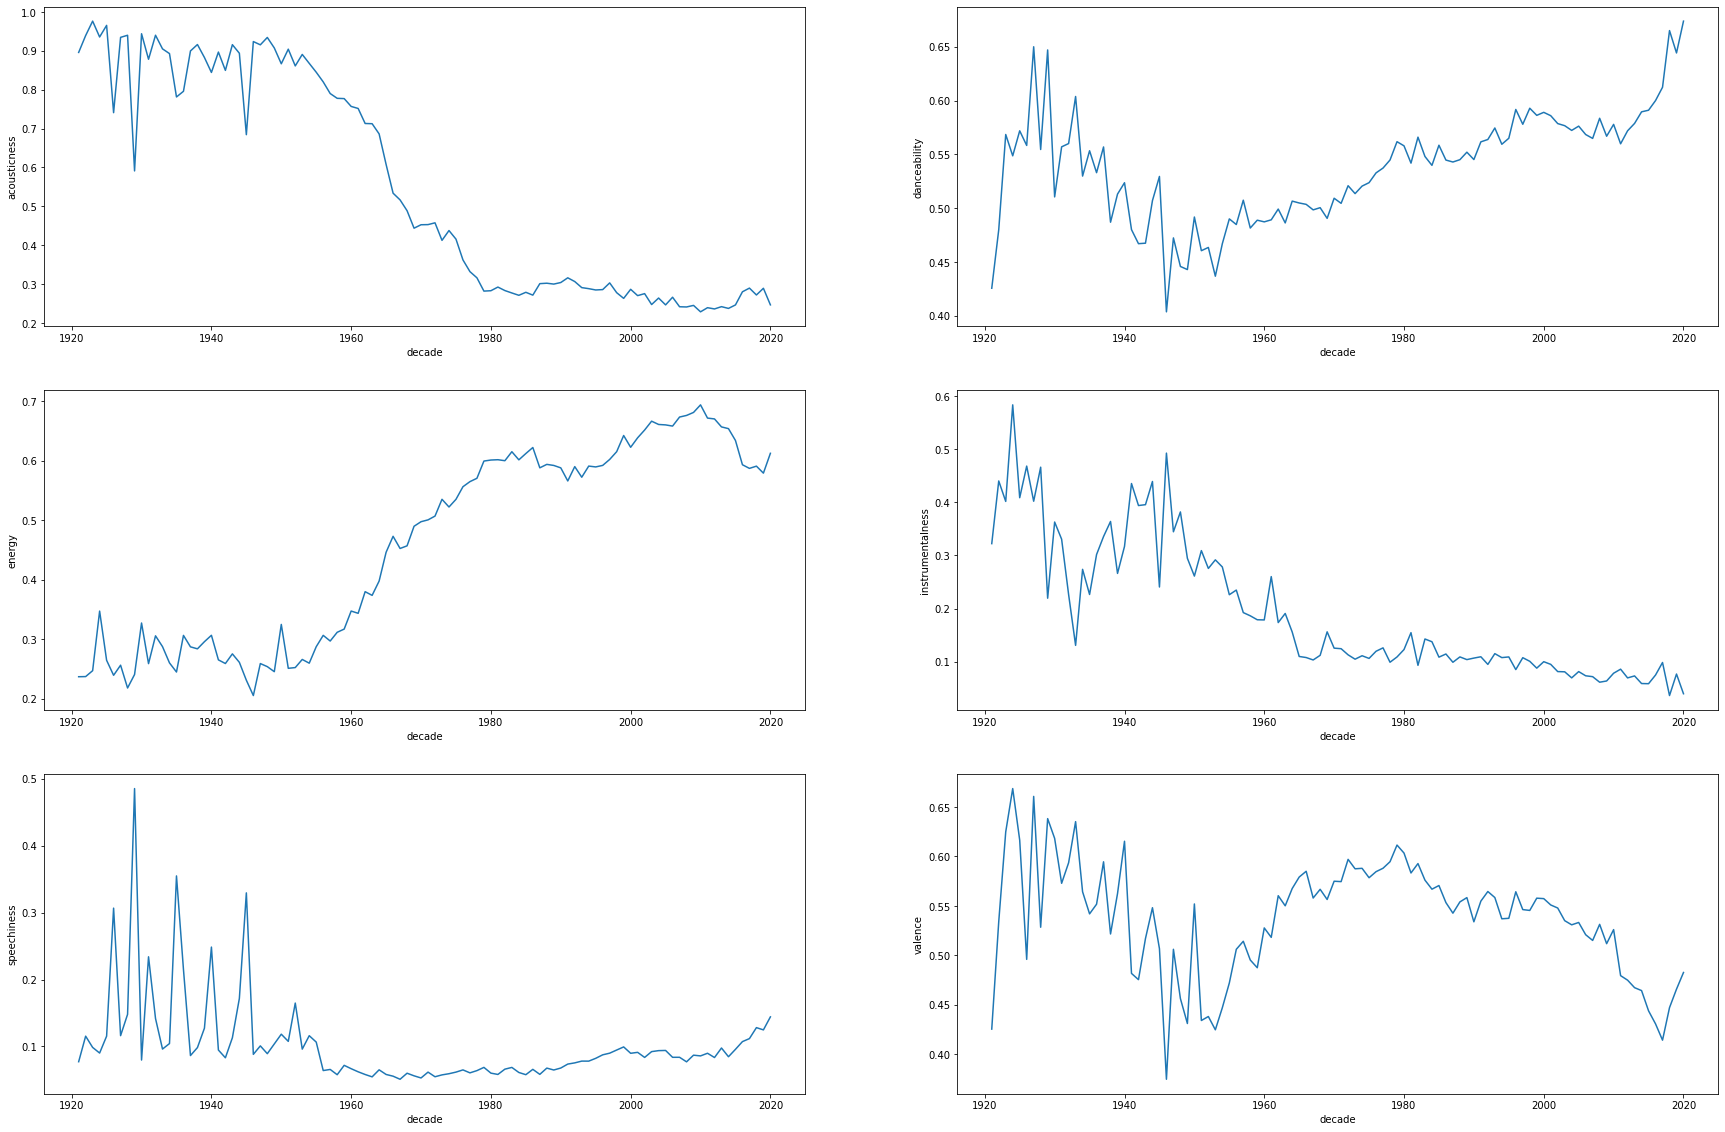

In [ ]:
sp1, elements = plt.subplots(3, 2) # Initiate the subplots

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: # Produce a line graph for each musical element
    data.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20)) # Group rows by year and get the mean values for that particular element
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

Explore the relationship between music elements and mode-key combination

In [ ]:
df = data.groupby(["mode", "key"]).agg("mean")
for i in range(2): # Loop through each unique value for the mode variable
    mode_df = data.query("mode == @i") # Filter df to only contain tracks of the present mode
    for j in range (12): # Loop through each unique value for key variable
        modekey_df = mode_df.query("key == @j") # Filter df to only contain tracks of the present key, partnered with the present mode acquired in the parent loop

mode_key = []
for i in range(2):
  for j in range(12):
    mode_key.append(str(i)+"_"+str(j))

df.insert(loc=0, column="count", value=data.groupby(["mode", "key"]).size())
df.insert(loc=0,column="mode-key",value =mode_key)
df

mode-key  count    duration_ms  ...  explicit  NumArtists  NameLength
mode key                                 ...                                  
0    0        0_0   4104  241814.671296  ...  0.073587    1.377437    4.553363
     1        0_1   3353  230051.904265  ...  0.182523    1.331942    4.134506
     2        0_2   4081  240866.542514  ...  0.057094    1.429552    4.638814
     3        0_3   1577  229016.937857  ...  0.105897    1.370958    4.410273
     4        0_4   5533  247604.153985  ...  0.106091    1.324236    4.220495
     5        0_5   5515  243508.683953  ...  0.107344    1.322393    4.314597
     6        0_6   3598  235844.335464  ...  0.178432    1.328794    4.026404
     7        0_7   4038  239005.468549  ...  0.057949    1.380634    4.519564
     8        0_8   1964  234352.020876  ...  0.161405    1.362016    4.012220
     9        0_9   5640  241023.910638  ...  0.071454    1.279255    4.292730
     10      0_10   4224  251929.951705  ...  0.185843    1.387784    4.514205
     11      0_11   5676  234933.035412  ...  0.196794    1.274313    4.108175
1    0        1_0  17325  228432.836364  ...  0.066436    1.302107    4.519827
     1        1_1   9419  234001.164455  ...  0.182716    1.404608    4.344092
     2        1_2  14676  233158.623808  ...  0.067389    1.311870    4.375443
     3        1_3   5559  225865.283864  ...  0.018349    1.481382    4.940457
     4        1_4   7339  220946.767680  ...  0.042513    1.262025    4.389426
     5        1_5  10762  226203.864337  ...  0.032429    1.375023    4.683702
     6        1_6   4951  225796.030297  ...  0.105231    1.296708    4.266411
     7        1_7  16655  225998.055359  ...  0.074812    1.298049    4.478835
     8        1_8   8702  229606.200758  ...  0.077453    1.360377    4.377959
     9        1_9  11940  226481.263400  ...  0.053099    1.241876    4.370938
     10      1_10   7758  222306.331915  ...  0.028229    1.410673    4.804847
     11      1_11   4871  229325.944980  ...  0.103264    1.298707    4.111476

[24 rows x 17 columns]

Rank the number to find the most and least popular key_mode combination and analyze their music elements

In [ ]:
df['count'].rank(ascending=False)

mode  key
0     0      18.0
      1      22.0
      2      19.0
      3      24.0
      4      13.0
      5      14.0
      6      21.0
      7      20.0
      8      23.0
      9      11.0
      10     17.0
      11     10.0
1     0       1.0
      1       6.0
      2       3.0
      3      12.0
      4       9.0
      5       5.0
      6      15.0
      7       2.0
      8       7.0
      9       4.0
      10      8.0
      11     16.0
Name: count, dtype: float64

key-mode: 0,1 (C major is the most popular):

In [ ]:
print(data.query("mode == 1 and key == 0").mean())
print("------------------------------------------------")
print(data.mean())

duration_ms         228432.836364
year                  1976.763232
acousticness             0.490800
danceability             0.539512
energy                   0.477037
instrumentalness         0.148532
liveness                 0.211026
loudness               -11.485170
speechiness              0.089767
tempo                  117.596937
valence                  0.541179
mode                     1.000000
key                      0.000000
popularity              31.309149
explicit                 0.066436
NumArtists               1.302107
NameLength               4.519827
dtype: float64
------------------------------------------------
duration_ms         231434.725257
year                  1977.339230
acousticness             0.491646
danceability             0.538725
energy                   0.489606
instrumentalness         0.160446
liveness                 0.206727
loudness               -11.342429
speechiness              0.094200
tempo                  116.995304
valence           

Most of the C-major songs are in the 70s where it is danceable and energetic.

## Clustering

In [ ]:
data.head()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,NumArtists,NameLength
0,158648,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1.0,4.0
1,282133,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2.0,6.0
2,104300,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1.0,5.0
3,180760,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1.0,5.0
4,687733,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2.0,6.0


In [ ]:
X = data.drop(columns='popularity')
y = data['popularity']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### all


### K-means

In [ ]:
############use Elbow method to find optimal k##########
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

from tqdm import tqdm
withinss = []
results = []
for i in tqdm(range(2,8)):
    kmeans = KMeans(n_clusters = i)
    model = kmeans.fit(X_std)
    labels = model.labels_
    withinss.append(model.inertia_)
    results.append(silhouette_score(X_std, labels))



100%|██████████| 6/6 [49:16<00:00, 492.76s/it]


Hi, please run the following two lines sepearately!!!!!!!  ;)
Dear TA, please run these following two lines sepearately, otherwise its hard to see the second picture's shapem!!!!!!


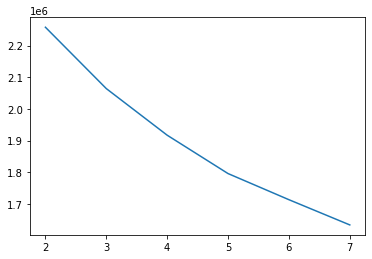

In [ ]:
from matplotlib import pyplot
print("Hi, please run the following two lines sepearately!!!!!!!  ;)")
#1
pyplot.plot([2,3,4,5,6,7],withinss)
print("Dear TA, please run these following two lines sepearately, otherwise its hard to see the second picture's shapem!!!!!!")

From the second graph we can see, Silhouette score drops dramatically after k=2, so I decided to use k=2


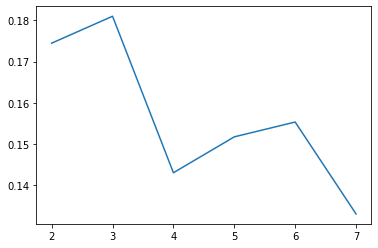

In [ ]:
pyplot.plot([2,3,4,5,6,7],results) 
print("From the second graph we can see, Silhouette score drops dramatically after k=2, so I decided to use k=2")

In [ ]:
#use selected features to build k-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
model = kmeans.fit(X_std)
labels = model.labels_
labels

from sklearn.metrics import silhouette_samples
silhouette_samples(X_std, labels)

from sklearn.metrics import silhouette_score
silhouette_score(X_std, labels)

#count how many are in first cluster and how many in second
l1 = []
l0 = []
l2 = []
for i in range(len(labels)):
    if labels[i] == 1:
        l1.append(labels[i])
    if labels[i] == 2:
        l2.append(labels[i])
    else:
        l0.append(labels[i])
        
print("There are "+ str(len(l1)) + " numbers in the first cluster")
print("There are "+ str(len(l0))+" numbers in the second cluster")
print("There are "+ str(len(l2))+" numbers in the third cluster")

#find the cluster center's characteristics
centers = model.cluster_centers_
print(centers)

There are 72327 numbers in the first cluster
There are 169260 numbers in the second cluster
There are 0 numbers in the third cluster
[[ 0.04263784  0.57321848 -0.67688755  0.29303885  0.66930286 -0.3198933
  -0.00358643  0.57191045 -0.07938319  0.20429324  0.26721089 -0.02464483
   0.02860995  0.14960177 -0.18429734 -0.24653811]
 [-0.05703595 -0.76678511  0.90546155 -0.39199334 -0.89531564  0.42791611
   0.00479751 -0.76503538  0.10618961 -0.27327977 -0.35744369  0.03296699
  -0.03827107 -0.20011987  0.24653157  0.32979005]]


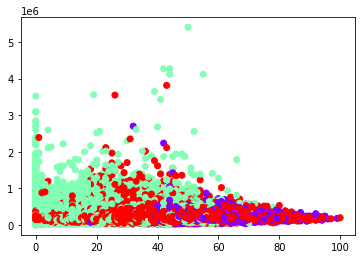

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
model = kmeans.fit(X_std) 
labels = model.predict(X_std)
# Plot cluster membership
from matplotlib import pyplot
pyplot.scatter(data['popularity'], data['duration_ms'], c=labels, cmap='rainbow')


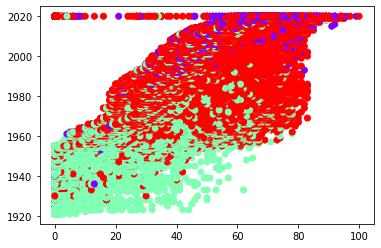

In [ ]:
pyplot.scatter(data['popularity'], data['year'], c=labels, cmap='rainbow')

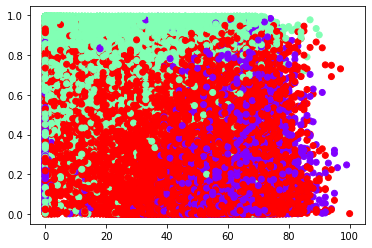

In [ ]:
pyplot.scatter(data['popularity'], data['acousticness'], c=labels, cmap='rainbow')

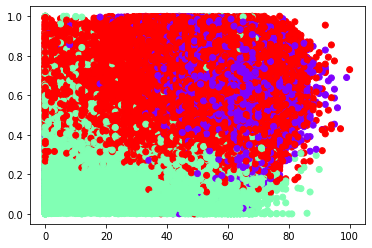

In [ ]:
pyplot.scatter(data['popularity'], data['energy'], c=labels, cmap='rainbow')

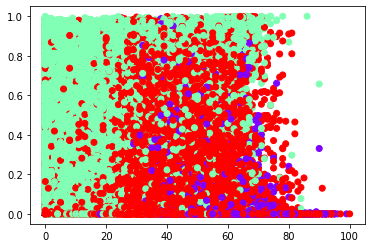

In [ ]:
pyplot.scatter(data['popularity'], data['instrumentalness'], c=labels, cmap='rainbow')

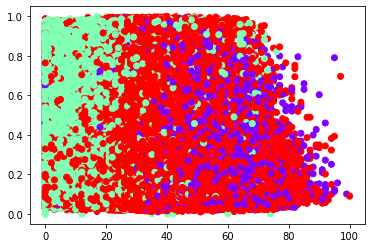

In [ ]:
pyplot.scatter(data['popularity'], data['liveness'], c=labels, cmap='rainbow')

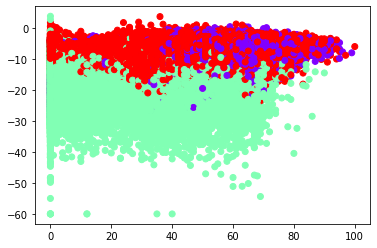

In [ ]:
pyplot.scatter(data['popularity'], data['loudness'], c=labels, cmap='rainbow')

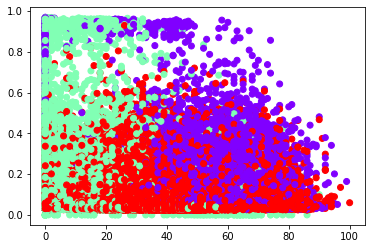

In [ ]:
pyplot.scatter(data['popularity'], data['speechiness'], c=labels, cmap='rainbow')

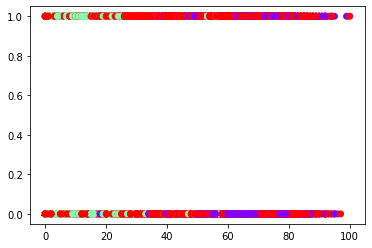

In [ ]:
pyplot.scatter(data['popularity'], data['mode'], c=labels, cmap='rainbow')

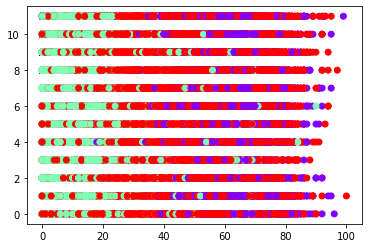

In [ ]:
pyplot.scatter(data['popularity'], data['key'], c=labels, cmap='rainbow')

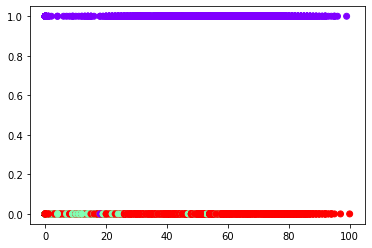

In [ ]:
pyplot.scatter(data['popularity'], data['explicit'], c=labels, cmap='rainbow')

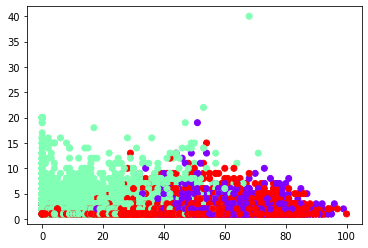

In [ ]:
pyplot.scatter(data['popularity'], data['NumArtists'], c=labels, cmap='rainbow')

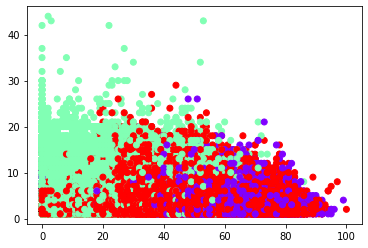

In [ ]:
pyplot.scatter(data['popularity'], data['NameLength'], c=labels, cmap='rainbow')

### DBSCAN

In [ ]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans

In [ ]:
X = data.drop(columns='popularity')
y = data['popularity']

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [ ]:
'''
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
'''

In [ ]:
######## number of cluster = 3 ##############
######## use this one ###########
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans

# Compute DBSCAN
db = DBSCAN(eps=0.45, min_samples=5).fit(X_std)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("numebr of clusters:" + str(n_clusters_))

numebr of clusters:3


Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 3')

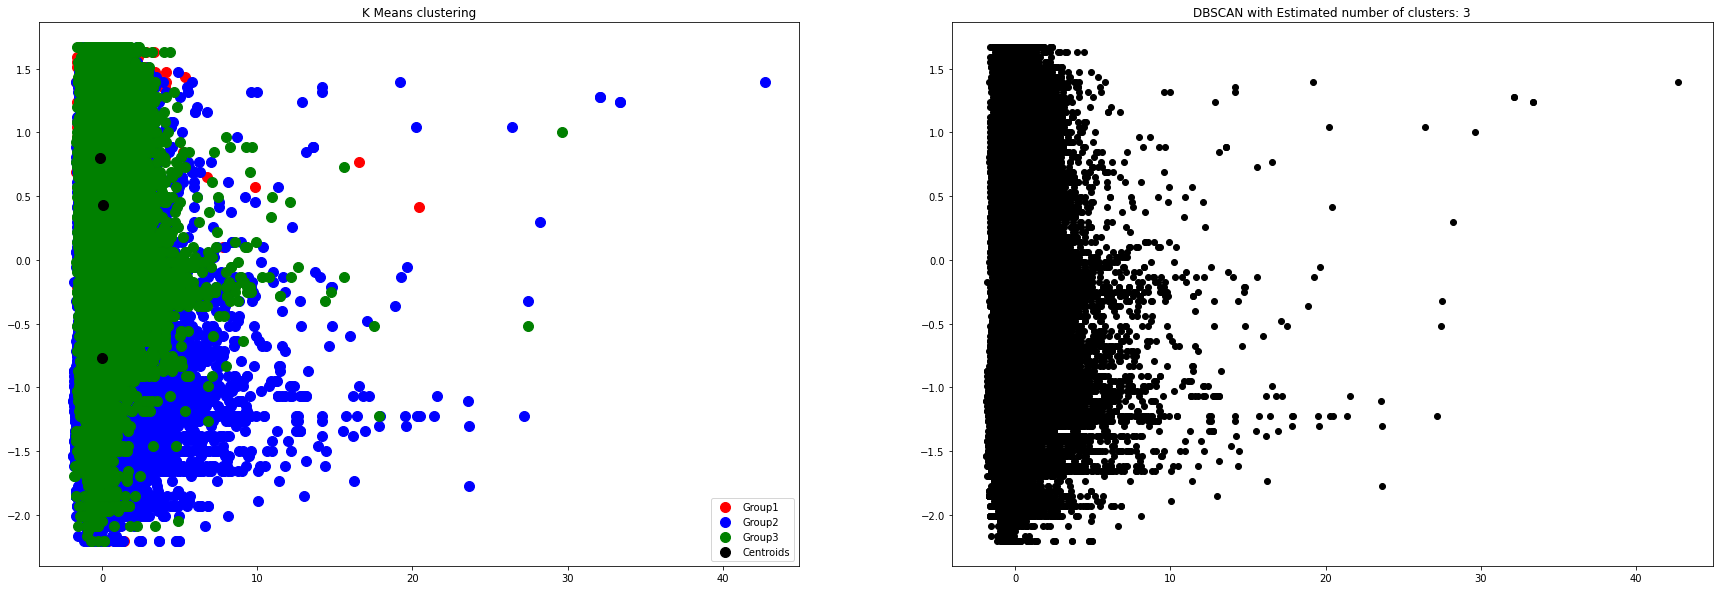

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols =2)
# fig, (ax3) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)

## PCA

In [ ]:
pip install bioinfokit

     |████████████████████████████████| 84 kB 1.9 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=9049b20a6760aaf43871c217dcb0b1d8696c7fc609e992b1605ebcae18483255
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=a78c3d7857f2d38ae9b065100113e77cabc17a2fb1fefd2ec13acf13c45644a0
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.visuz import cluster

In [ ]:
X = data.drop(columns='popularity')
y = data['popularity']

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10) 
pca.fit(X)
pca.explained_variance_ratio_

array([9.99999888e-01, 6.70045496e-08, 4.22141921e-08, 1.61949388e-09,
       8.42323461e-10, 6.25281581e-10, 4.73425218e-11, 1.39431415e-11,
       6.96384739e-12, 5.05498499e-12])

In [ ]:
X_st =  StandardScaler().fit_transform(X)
pca_out = PCA().fit(X_st)

In [ ]:
loadings = pca_out.components_

In [ ]:
pca_out.explained_variance_

array([3.74242568, 1.65155831, 1.5267745 , 1.1982863 , 1.09907043,
       1.0158912 , 0.92650874, 0.91065985, 0.83549757, 0.74992217,
       0.61982712, 0.5188597 , 0.47779628, 0.34065092, 0.26468508,
       0.12168068])

ValueError: ignored

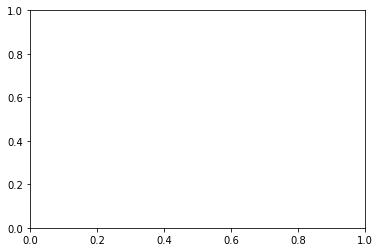

In [ ]:
# get biplot
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist='target')

In [ ]:
pip install psynlig

     |████████████████████████████████| 6.5 MB 14.8 MB/s 
     |████████████████████████████████| 2.8 MB 36.0 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=34746ad8c40c4fb8cea5606b5fcd64b3461c7143679e3c6f58371b29e4dc0382
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sphinx-gallery: filename=sphinx_gallery-0.10.1-py3-none-any.whl size=132569 sha256=7119cc15ae8fc03d2c8b17f74c21e69935840e0e825e12d17d4fb8efcaaa6fd7
  Stored in directory: /root/.cache/pip/wheels/52/72/6f/d5817eb58b7f5a43cc40b0186bbfa9ce3ea9cdbd9881c7cd50
Successfully built adjustText sphinx-gallery


In [ ]:
from psynlig import pca_2d_scores
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
X = data.drop(columns='popularity')
y = data['popularity']

In [ ]:
pca = PCA()
scores = pca.fit_transform(X)

In [ ]:
loading_settings = {
    'add_text': True,
    'add_legend': False,
    'biplot': True,
    'text': {
        'fontsize': 'x-large',
        'alpha': 0.8,
        'outline': {'linewidth': 1.5}
    },
}

xvars = ['duration_ms',	'year',	'acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'loudness',	'speechiness',	'tempo',	'valence',	'mode',	'key',	'explicit',	'NumArtists',	'NameLength']
class_data = data['popularity']
class_names = dict(enumerate(data['popularity']))
X = scale(X)

In [ ]:
pca_2d_scores(
    pca,
    scores,
    xvars=xvars,
    class_data=class_data,
    class_names=class_names,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=150,
    alpha=.5,
    cmap_loadings='plasma',
)

IndexError: ignored

In [ ]:
data_set = load_breast_cancer()
data = pd.DataFrame(data_set['data'], columns=data_set['feature_names'])
xvars = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'mean symmetry',
    'mean fractal dimension',
]
data = data[xvars]
class_data = data_set['target']
class_names = dict(enumerate(data_set['target_names']))
data = scale(data)

pcloading_settings = {
    'add_text': True,
    'add_legend': False,
    'biplot': True,
    'text': {
        'fontsize': 'x-large',
        'alpha': 0.8,
        'outline': {'linewidth': 1.5}
    },
}a = PCA()
scores = pca.fit_transform(data)



pca_2d_scores(
    pca,
    scores,
    xvars=xvars,
    class_data=class_data,
    class_names=class_names,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=150,
    alpha=.5,
    cmap_loadings='plasma',
)

loading_settings = {
    'add_text': False,
    'add_legend': True,
    'biplot': True,
}

pca_2d_scores(
    pca,
    scores,
    xvars=xvars,
    class_data=class_data,
    class_names=class_names,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=150,
    alpha=.5,
    cmap_class='Spectral',
)
plt.show()